# 分类问题——使用softmax

In [ ]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
#这三个模块是必须的
import matplotlib.pyplot as plt

In [2]:
# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
#100行两列的张量（全1）
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
#100行两列的张量(第一个是横坐标，第二个是纵坐标）
#xo是2*ndata为均值，1为标准差的数据
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, )
#一行一百列
#这一对数据的标签是零
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
#xo是-2*ndata为均值，1为标准差的数据(第一个是横坐标，第二个是纵坐标）
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, )
#pytorch只处理二维数据，这样做的目的是使原来一维的数据变成二维数据

# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), ).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
#print("x=",x)
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer
#print("y=",y)
#向下拼接数据（y是标签，为整数，x是浮点数）


In [3]:
x,y=Variable(x),Variable(y)
#还是一样，要变成Variable才能输入神经网络

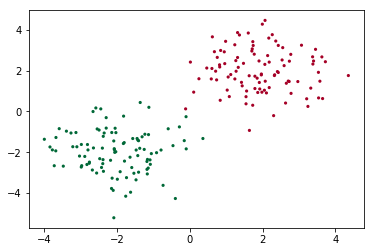

In [4]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=10, lw=0, cmap='RdYlGn')
#c是颜色序列，一半是0，一半是1
#s是点的大小
plt.show()

In [5]:
#定义神经网络,用一个class来定义

class Net(torch.nn.Module):#继承了module这个模块
    def __init__(self,n_features,n_hidden,n_output):#搭建层所需要的信息
        super(Net,self).__init__()
        #继承父类的构造函数（必须在实现我们自己的功能之前添上的）
        self.hidden=torch.nn.Linear(n_features,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
        #每一层都是Net的一个属性
        #这样就定义好了我们即将使用的这个神经网络的层

    def forward(self,x):#神经网络前向传递过程
        #x——输入信息
        x=F.relu(self.hidden(x))
        #隐藏层的输出经过relu激活函数
        x=self.predict(x)
        x=F.softmax(x)
        return x
#神经网络还是和回归的一样

In [6]:
net=Net(2,10,2)
#输入是横坐标和纵坐标两个维度
#输出是one-hot编码(0,1)或者(1,0）


In [7]:
#定义损失函数和优化函数
optimizer=torch.optim.SGD(net.parameters(),lr=0.002)
#用SGD优化神经网络，同时传入神经网络的参数,并将学习率设置为0.002

loss_func=torch.nn.CrossEntropyLoss()
#一般来说，分类问题的误差函数用交叉差

In [8]:
plt.ion()   # something about plotting
#开始画动态图


E:\pyython\conda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


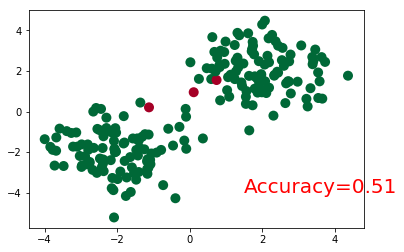

epoch= 1


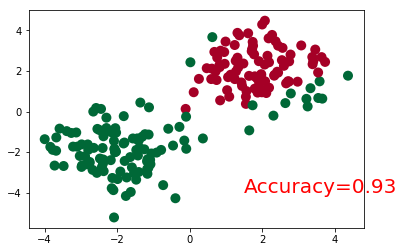

epoch= 101


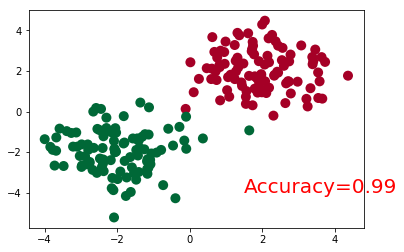

epoch= 201


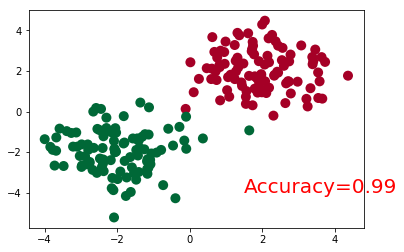

epoch= 301


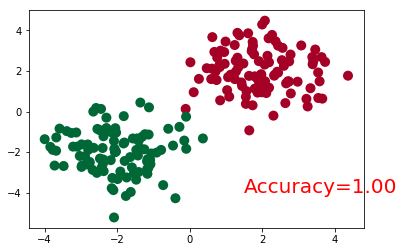

epoch= 401


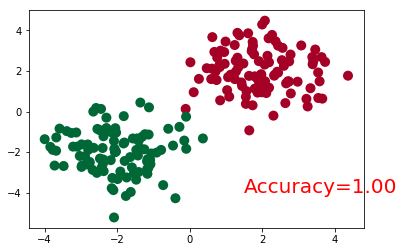

epoch= 501


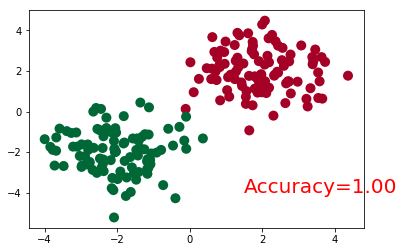

epoch= 601


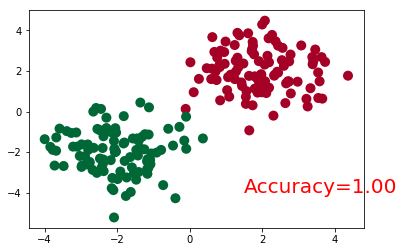

epoch= 701


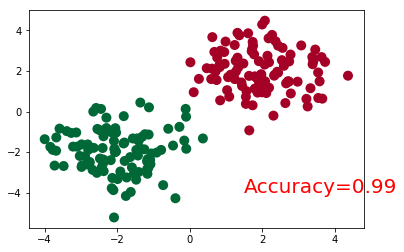

epoch= 801


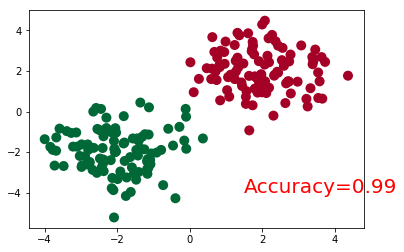

epoch= 901


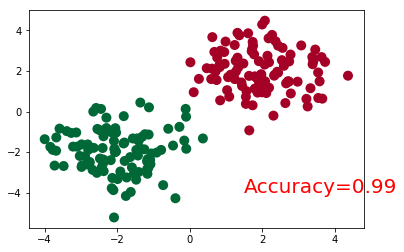

epoch= 1001


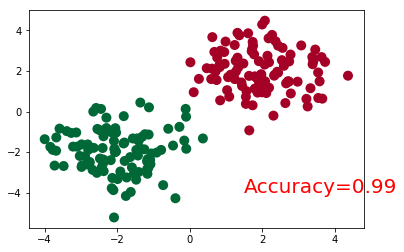

epoch= 1101


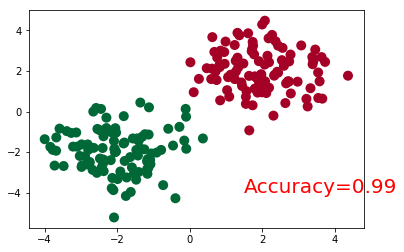

epoch= 1201


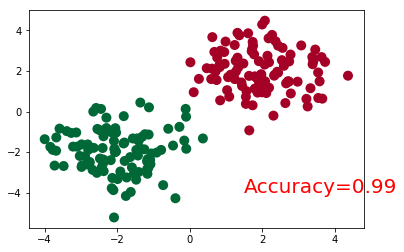

epoch= 1301


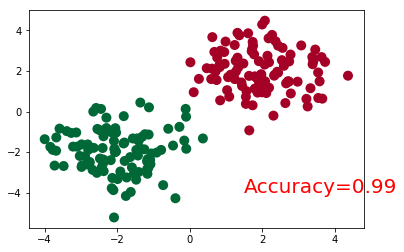

epoch= 1401


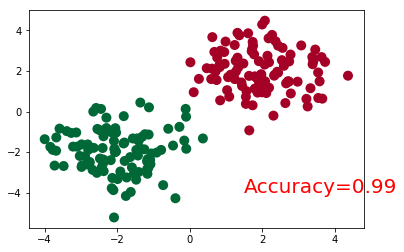

epoch= 1501


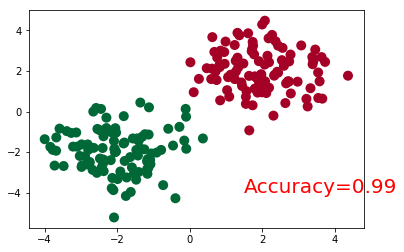

epoch= 1601


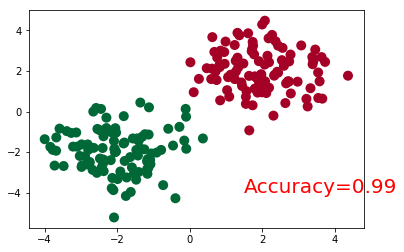

epoch= 1701


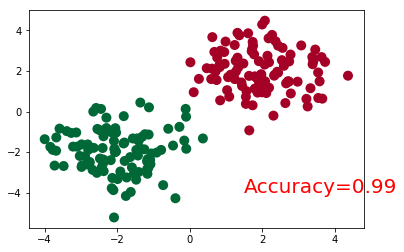

epoch= 1801


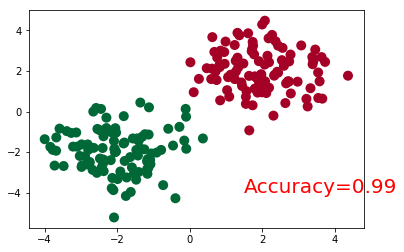

epoch= 1901


In [9]:
for t in range(2000):
    prediction=net(x)
    loss=loss_func(prediction,y)
    #下面三部开始进行优化
    optimizer.zero_grad()
    #所有参数的梯度先降为零
    loss.backward()
    #误差反向传递
    optimizer.step()
    #用反向传播的误差优化我的参数
     # 接着上面来
    if t % 100 == 0:
        plt.cla()#q去掉坐标轴
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(prediction, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        print("epoch=",t+1)

In [10]:
plt.ioff()  # 停止画图
plt.show()

Parameter containing:
tensor([[ 0.0075, -0.3115],
        [-0.3879, -0.4122],
        [ 0.4687,  0.3294],
        [-0.3803, -0.1455],
        [ 0.4788,  0.4472],
        [ 0.4470,  0.2472],
        [ 0.4872, -0.2819],
        [ 0.3192, -0.3684],
        [ 0.1677,  0.2517],
        [-0.5098,  0.5724]], requires_grad=True)
